In [1]:
import sys
sys.path.append("../")

In [3]:
from libraries.dataManipulation import *
from libraries.gridManipulation import *
import time
import datetime
import pandas as pd

In [4]:
#GRID CONFIGURATION IS DECLARED
o_x = 5000
o_y = -10000
o = (o_x,o_y)

patch_width = 3750
patch_height = 5000
patch_size = (patch_width, patch_height)

total_patches = (18,3)
abs_total_patches = total_patches[0]*total_patches[1]

grid_angle = 0.9

trying to fetch: /storage/surfsara/ProRail_USE_LL_data/ehv/background_images/EHV.Perron2.1_multisensor.png
background fetched. Accessible as <this-object>.bg


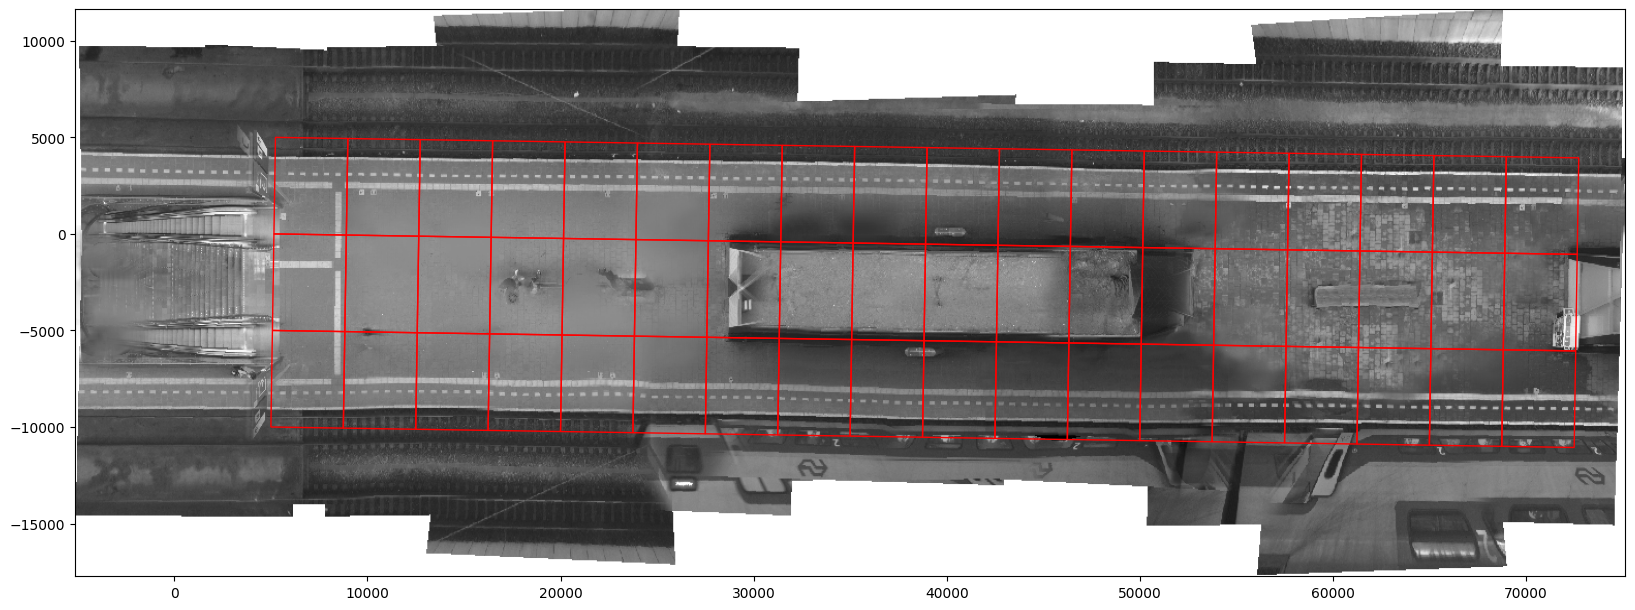

In [5]:
#GRID IS CREATED USING CONFIG
grid = create_grid(o, patch_size, total_patches, grid_angle)
#GRID IS PLOTTED ON STATION
plot_grid(grid, 'ehv')

In [6]:
# Storage connection class
dh = SociophysicsDataHandler()

daylist = dh.list_files('/ehv/platform2.1')['name']
day_numbers = []
for i in range(len(daylist)):
    day_numbers.append(int(daylist[i]))

targeting path /storage/surfsara/ProRail_USE_LL_data//ehv/platform2.1
Files listed. Accessible as <this-object>.filelist


In [7]:
%%time
%%capture
#data = getHours(0,2,20210330, 'ehv')
data = getDay(20220320, 'ehv')

data = data.drop(data[data.x_pos < o_x].index)
data = data.drop(data[data.y_pos < o_y].index)
data = data.drop(data[data.x_pos > (total_patches[0]-1)*patch_width].index)
data = data.drop(data[data.y_pos > (total_patches[1]-1)*patch_height].index)

data = data.drop(['datetime'], axis=1)
data['time'] = (data['date_time_utc'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

### !!!!! COLUMN ON WHETHER TRAIN IS IN STATION AT THAT MOMENT HAS TO BE ADDED !!!! ####

CPU times: user 16.6 s, sys: 4.61 s, total: 21.3 s
Wall time: 37.5 s


In [ ]:
data

In [16]:
from sociophysicsDataHandler import SociophysicsDataHandler
!pip install -q SociophysicsDataHandler

In [33]:
df = SociophysicsDataHandler()
df.list_files('/ehv')

targeting path /storage/surfsara/ProRail_USE_LL_data//ehv
Files listed. Accessible as <this-object>.filelist


,path,name,attributes
0,/storage/surfsara/ProRail_USE_LL_data/ehv/back...,background_images,"{'{DAV:}getlastmodified': 'Wed, 28 Sep 2022 09..."
1,/storage/surfsara/ProRail_USE_LL_data/ehv/ehv_...,ehv_train_information_pss.parquet,"{'{DAV:}getlastmodified': 'Thu, 01 Dec 2022 17..."
2,/storage/surfsara/ProRail_USE_LL_data/ehv/move...,move_from_tmp.sh,"{'{DAV:}getlastmodified': 'Fri, 17 Dec 2021 11..."
3,/storage/surfsara/ProRail_USE_LL_data/ehv/plat...,platform2.1,"{'{DAV:}getlastmodified': 'Tue, 06 Dec 2022 09..."
